<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and regression modeling for a case study: Predict house price range in Hanoi 2019 and 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Student Name: Do Hoang Duc (s3788345)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard.

# Hypothesis forming:


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [516]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [517]:
# check the version of the packages
print(np.__version__)
print(pd.__version__)

1.19.5
1.3.4


<p> In order to have an accurate result, data prepration step must be done precisely. First of all, data from the csv file which is named "VN_housing_dataset.csv" is loaded by "read_csv" in pandas function. After that, all the data types must be checked to ensure no column has incorrect data types assigned. Having been checked the data types, the loaded data is cleaned by 6 steps which are typos, extra-whitespaces, upper/lower-case, sanity checks, missing values, and categorical data </p>

# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [518]:
%time
# import test dataset
df = pd.read_csv('./VN_housing_dataset.csv', delimiter=',', skipinitialspace = True)
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

Wall time: 0 ns


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The 'Ngày' will be the date which will contain all the day, month, year value
- The 'Địa chỉ' will be the address which contains the street, ward, district, city
- The 'Quận' is district
- The 'Huyện' is not suppose to be the ward. However, the content they have is actually the ward
- The 'Loại hình nhà ở' is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The 'Giấy tờ pháp lý' is the legal document either already have, or on waiting, or others documents.
- The 'Số tầng' is the number of floor
- The 'Số phòng ngủ' is the number of bedroom
- The 'Diện tích' is the area unit in meter square
- The 'Dài' is the length unit in meter
- The 'Rộng' is the width unit in meter
- The 'Giá/m2' is the price in million VND per meter square

In [519]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

## About This Dataset
***

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...
***
**Categorical:**
- **Nominal**
    > - **Address**
    > - **District**
    > - **Ward**
    > - **Housing_type**
    > - **Legal_documents**
- **Ordinal**
    > - **No_room**
    > - **No_floor**
***
**Numeric:**
- **Continuous**
  >  - **Area**
  >  - **Length**
  >  - **Width**  
  >  - **Price**
***
**Date/time:**
- **Date**(Nominal variable)

## Data types
***

### Change data types

In [520]:
# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


In [521]:
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

### Remove prefix & Typo check

In [522]:
df['District'] = df['District'].replace('Quận\s', '', regex=True)
# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [523]:
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

In [524]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [525]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [526]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





In [527]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





### Translate the content

In [528]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


### Lowercase

In [529]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


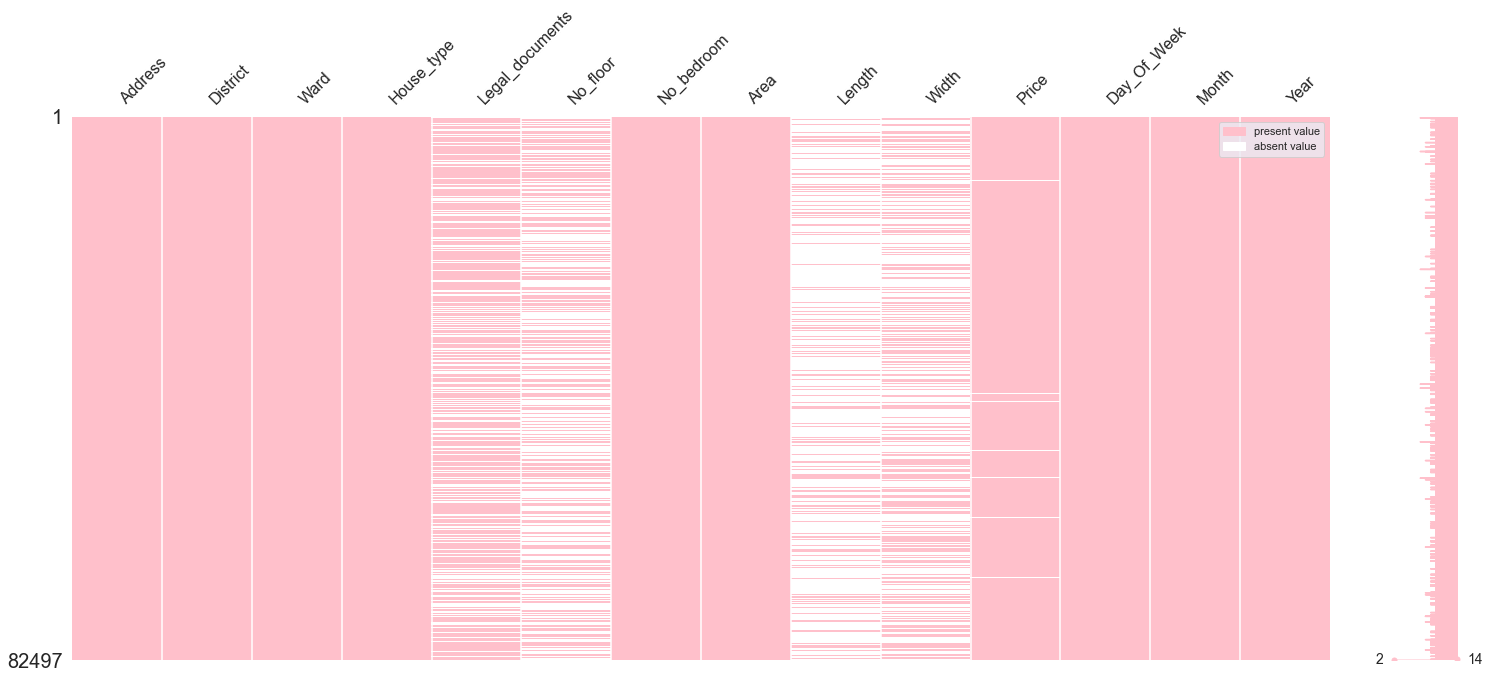

In [530]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `No_floor`, `Length` and `Width`.


<hr>

In [531]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [532]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [533]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)
# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [553]:
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14095
MONDAY       13587
THURSDAY     12252
WEDNESDAY    12187
FRIDAY       12008
SATURDAY     10466
SUNDAY        6532
Name: Day_Of_Week, dtype: Int64

In [534]:
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [535]:
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [536]:
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

In [537]:
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [538]:
df['House_type'].value_counts(dropna=False)
df['House_type'].fillna("BYROAD", inplace=True)

In [539]:
df[['Address', 'Ward', 'District']][df['District'].isna()]

,Address,Ward,District


In [540]:
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


As you can see the address is not specific location. Hence, there is no specific ward because a street can have multiple ward. Thus, we should only fill the missing value with None.

In [541]:
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
38                     2
12                     2
50                     2
30                     1
32                     1
54                     1
52                     1
40                     1
14                     1
65                     1
55                     1
73                     1
25                     1
42                     1
33                     1
29                     1
Name: No_floor, dtype: Int64

In [542]:
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [543]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [544]:
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

In [545]:
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [546]:
#Different Location have different housing area
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

# df['Number_of_room'] = df.groupby('Area')['Number_of_room'].apply(lambda x: x.fillna(x.median()))
df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
df['Width'].fillna(df['Width'].mean(), inplace=True)

In [547]:
df['Street'] = df['Address'].str.split(',', expand=True)[0]
df['Street'] = df['Street'].replace('ĐƯỜNG\s', '', regex=True)
df['Street'] = df['Street'].replace('PHỐ\s', '', regex=True)
df['Street'].unique()

<StringArray>
[                   'HOÀNG QUỐC VIỆT',                          'KIM GIANG',
                          'MINH KHAI',                           'VÕNG THỊ',
                            'YÊN HÒA',                            'TÂY SƠN',
                             'LÒ ĐÚC',                            'XUÂN LA',
                               '19/5',                           'TỰU LIỆT',
 ...
                       'TRẦN CAO VÂN',                             '68/114',
                              'TÚ MƠ',                            'NGÕ 127',
                          '15/22/269',                   'SỐ 9 NGÕ 211/229',
          'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',              'LÊ TRỌNG TẤN HOÀI ĐỨC',
               'LẠC LONG QUÂN TÂY HỒ', 'SỐ 7 ĐẠI LỘ THĂNG LONG NAM TỪ LIÊM']
Length: 4434, dtype: string

In [548]:
df.drop('Address', 1, inplace=True)

In [549]:
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Year               0
Street             0
dtype: int64

## Extra-whitespaces

In [550]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

whitespace_remover(df)

### ----------> OBSERVATION
<hr>

> There is no typo left

<hr>

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [551]:
# df
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82494
Number of duplicated records in df:  1367
Number of rows after drop of duplicates in df: 81127 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81127 entries, 0 to 82495
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81127 non-null  string 
 1   Ward             81127 non-null  string 
 2   House_type       81127 non-null  string 
 3   Legal_documents  81127 non-null  string 
 4   No_floor         81127 non-null  string 
 5   No_bedroom       81127 non-null  string 
 6   Area             81127 non-null  Float64
 7   Length           81127 non-null  Float64
 8   Width            81127 non-null  Float64
 9   Price            81127 non-null  Float64
 10  Day_Of_Week      81127 non-null  string 
 11  Month            81127 non-null  Int32  
 12  Year             81127 non-null  Int32  
 13  Street           81127 non-null  string 
dt

In [552]:
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Year', 'Street'],
      dtype='object')